# Background Replacement

### This notebook introduces background replacement for input images. This function allows for replacing the background of the image. The implementation allows automatic foregound mask generation using the RMBG-1.4 model. In this notebook, we will provide a step-by-step guide to replacing the background of a given image.

Define an input image

In [1]:
from PIL import Image
import os, sys

input_path = '../inputs/background-replacement/camera.png'
input_image = Image.open(input_path)

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(current_dir), '..'))
sys.path.append(os.path.join(parent_dir, 'code'))

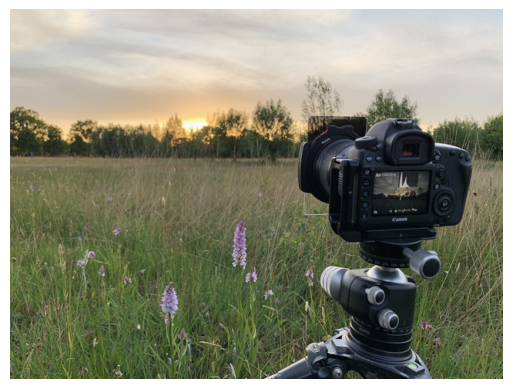

In [2]:
from matplotlib import pyplot as plt

plt.imshow(input_image)
plt.axis('off')
plt.show()

Define the number of the inference steps

In [3]:
steps = 20

Define the prompt for the background replacement

In [4]:
prompt = 'savanna with wild animals'

Extract foreground image and mask using the RMBG-1.4 model

In [5]:
from extract_foreground import extract_foreground_image, extract_foreground_mask

forground_image = extract_foreground_image(input_image)
foreground_mask = extract_foreground_mask(forground_image)

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

c:\Users\nobis\anaconda3\envs\image-editing-env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nobis\.cache\huggingface\hub\models--destitech--controlnet-inpaint-dreamer-sdxl. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.50G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

c:\Users\nobis\anaconda3\envs\image-editing-env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nobis\.cache\huggingface\hub\models--briaai--RMBG-1.4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

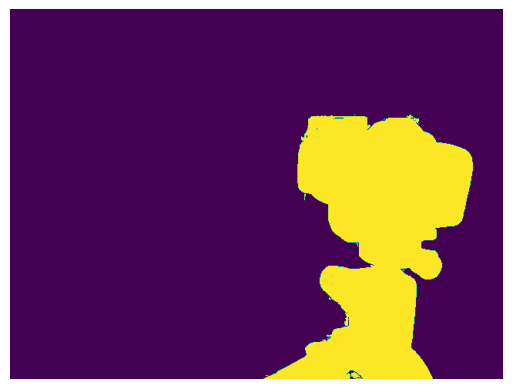

In [6]:
plt.imshow(foreground_mask)
plt.axis('off')
plt.show()

Load the Stable Diffusion model for inpainting

In [7]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
    )
pipe.to("cuda")

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

c:\Users\nobis\anaconda3\envs\image-editing-env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nobis\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-inpainting. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.29.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-2-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Apply dilation to the mask, to enhance the the results and remove unwanted features, like shadows of the foreground element

In [8]:
from operations_image import expand_white_areas_outpainting
import numpy as np

size = np.array(input_image).shape[:2]
    
# reverse the mask for outpainting
reversed_mask_array = 255 - np.array(foreground_mask)
reversed_mask_array = Image.fromarray(reversed_mask_array)
reversed_mask_array = expand_white_areas_outpainting(reversed_mask_array, 2) #optional

In [9]:
from background_replace_sd import background_replace_mask_stablediffusion

output_image = background_replace_mask_stablediffusion(input_image, foreground_mask, prompt, steps)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\attention_processor.py:1416: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/20 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\image_processor.py:110: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


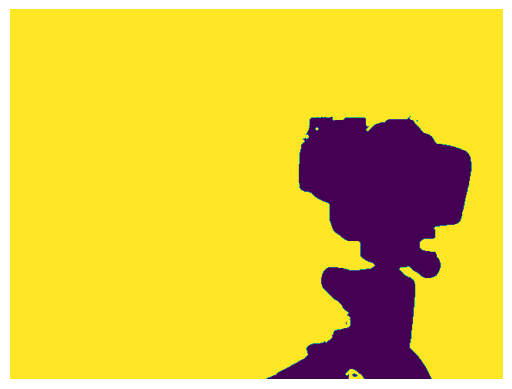

In [10]:
plt.imshow(reversed_mask_array)
plt.axis('off')
plt.show()

Infer the model on the input image to obtain the foreground mask

In [11]:
resized_input_image = input_image.resize((512, 512))
resized_reversed_mask_array = reversed_mask_array.resize((512, 512))
output_image = pipe(prompt=prompt, 
                    image=resized_input_image, 
                    mask_image=resized_reversed_mask_array,  
                    guidance_scale=7.5, 
                    num_inference_steps=steps).images[0]
resized_output_image = output_image.resize((size[1], size[0]))

  0%|          | 0/20 [00:00<?, ?it/s]

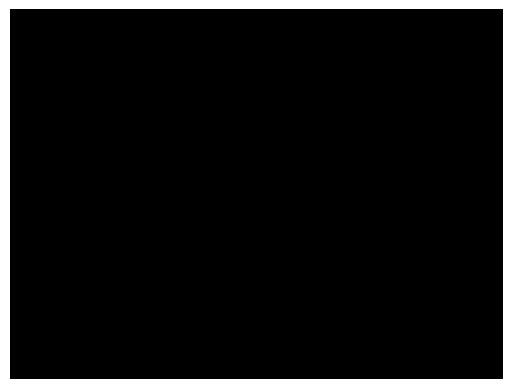

In [12]:
plt.imshow(resized_output_image)
plt.axis('off')
plt.show()

Visalise the final result

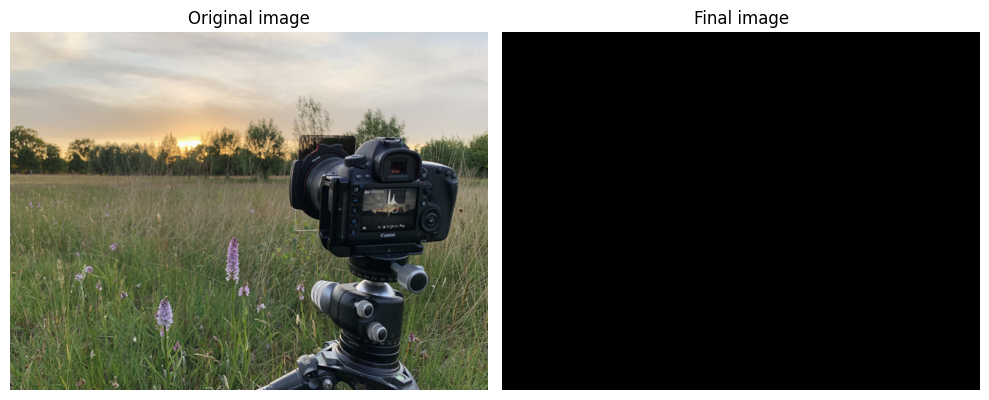

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Original image')

# Display the second image in the right subplot
axs[1].imshow(resized_output_image)
axs[1].axis('off')
axs[1].set_title('Final image')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()